In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
eta = 1

In [15]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [16]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [17]:
def bias(y, z):
    return (y - z)

In [18]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))

        trees.append(tree)
        
    return trees

In [19]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)   
    train_error = mean_squared_error(y_train, train_prediction)

    test_prediction = gb_predict(X_test, trees, coefs, eta)
    test_error = mean_squared_error(y_test, test_prediction)

    return train_error, test_error

In [20]:
# evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

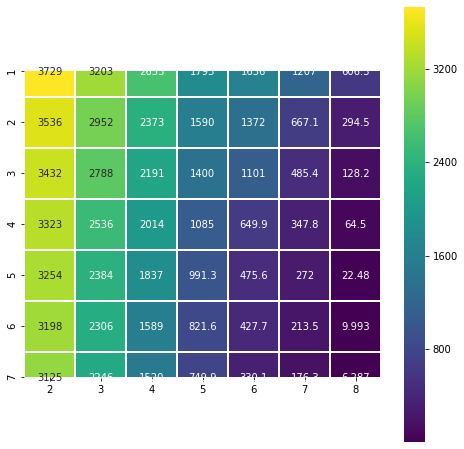

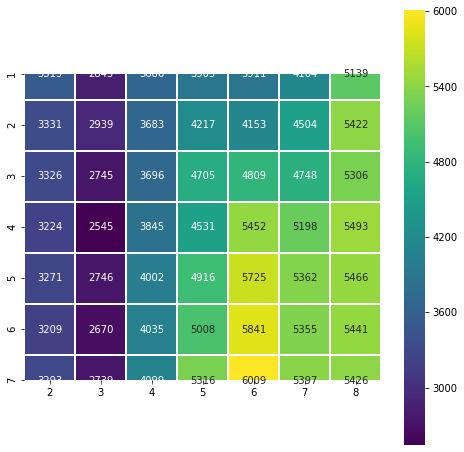

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def print_err_graph2(errors, max_depth_arr, n_trees_arr):
    fig, axes = plt.subplots(1, 1, figsize=(8,8))
    data = {}
    fr = pd.DataFrame(np.array(errors), index=max_depth_arr, columns=n_trees_arr)
    sns.heatmap(fr, cmap='viridis', annot=True, fmt='.4g', linewidths=1, square=True, ax=axes)

def compare_graph(n_trees_arr, max_depth_arr):
    train_errors_compare = []
    test_errors_compare = []    

    for n_trees in (n_trees_arr):
        coefs = [1] * n_trees
        train_errors_4_tree = []
        test_errors_4_tree = []
        for max_depth in (max_depth_arr):
            trees = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
            train_err, test_err = evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
            train_errors_4_tree.append(train_err)
            test_errors_4_tree.append(test_err)
        train_errors_compare.append(train_errors_4_tree)
        test_errors_compare.append(test_errors_4_tree)

    print_err_graph2(train_errors_compare, max_depth_arr, n_trees_arr)
    print_err_graph2(test_errors_compare, max_depth_arr, n_trees_arr)
    
compare_graph([2,3,4,5, 6,7, 8], [1, 2, 3, 4, 5, 6, 7])


In [ ]:
#при увеличении количества деревьев и максимальной глубины уменьшается ошибка на тренировочных данных, но увеличивается на тестовых.
#для лучшего результата нужно подбирать такие значение, чтобы ошибка на тесте и на трейне была максимально мала и при этом
#не сильно отличалась